In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### CAR SALE DATA ANALYSIS 

In [17]:
df=pd.read_csv("Car_sales (1)_336060.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Kerb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [18]:
###Preliminary data cleaning (checking for duplicate entries/ missing entries/ incorrectly listed entries etc.)



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   resale_value        121 non-null    float64
 4   Vehicle_type        157 non-null    object 
 5   Price_in_thousands  155 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    float64
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Kerb_weight         155 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     154 non-null    float64
 14  Latest_Launch       157 non-null    object 
 15  Power_perf_factor   155 non-null    float64
dtypes: float

In [29]:
df["Latest_Launch"]=pd.to_datetime(df["Latest_Launch"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Manufacturer        157 non-null    object        
 1   Model               157 non-null    object        
 2   Sales_in_thousands  157 non-null    float64       
 3   resale_value        121 non-null    float64       
 4   Vehicle_type        157 non-null    object        
 5   Price_in_thousands  155 non-null    float64       
 6   Engine_size         156 non-null    float64       
 7   Horsepower          156 non-null    float64       
 8   Wheelbase           156 non-null    float64       
 9   Width               156 non-null    float64       
 10  Length              156 non-null    float64       
 11  Kerb_weight         155 non-null    float64       
 12  Fuel_capacity       156 non-null    float64       
 13  Fuel_efficiency     154 non-null    float64       

### There are 157 entries in which 12 columns are numeric  with dtype float  and 3 column with categorical data  with dtype object  and 1 date time 

In [21]:
df.describe()

,Sales_in_thousands,resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Kerb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [ ]:
sales_in thousand --> median <mean  can  say the the  it has outliers right skew  

In [123]:

for i in df.columns:
    if df[i].dtype== "float64":
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        print(f"outliers for {i}")
        print(f" ll={ll}  uu={ul}")
        outliers=((df[i]< ll) | (df[i]>ul)).sum()
        print (outliers)
        df2=df[(df[i]>ll)|(df[i]<ul)]
df2

outliers for Sales_in_thousands
 ll=-67.171375  uu=153.049625
12
outliers for resale_value
 ll=5.534374999999998  uu=23.679375
14
outliers for Price_in_thousands
 ll=-2.2174999999999976  uu=51.144499999999994
4
outliers for Engine_size
 ll=0.4374999999999998  uu=5.3375
2
outliers for Horsepower
 ll=49.375  uu=306.375
0
outliers for Wheelbase
 ll=89.63749999999999  uu=125.73750000000001
4
outliers for Width
 ll=60.9875  uu=80.4875
0
outliers for Length
 ll=150.8125  uu=223.3125
3
outliers for Kerb_weight
 ll=1.7288750000000002  uu=4.9978750000000005
4
outliers for Fuel_capacity
 ll=9.862500000000004  uu=25.162499999999994
9
outliers for Fuel_efficiency
 ll=16.0  uu=32.0
10
outliers for Power_perf_factor
 ll=18.012836575  uu=126.56628565499999
0


,Manufacturer,Model,Sales_in_thousands,resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Kerb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,13.790,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,S70,15.245,13.790,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,V70,17.531,13.790,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,C70,3.493,13.790,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357


In [124]:
df2.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
resale_value          0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Kerb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

##  here we go  we have  null values  in  our  data  for these columns


In [125]:
df2.skew(numeric_only=True)

Sales_in_thousands    3.356278
resale_value          2.289718
Price_in_thousands    1.201554
Engine_size           0.612274
Horsepower            0.289424
Wheelbase             1.093289
Width                 0.515854
Length               -0.091598
Kerb_weight           0.739792
Fuel_capacity         1.194279
Fuel_efficiency       0.674992
Power_perf_factor     0.366462
dtype: float64

In [126]:
## So  for all  null columns we find that  each have probably  skewness greater  than 0 meands the  data is  highly  skewed so  here  we need to   impute the null values with  median

In [127]:
# handling misssing 


In [130]:
df2=df2.fillna({"resale_value":df2["resale_value"].median(),
           "Kerb_weight":df2["Kerb_weight"].median(),
           "Fuel_efficiency":df2["Fuel_efficiency"].median()})
df2           
 #  here  we  can  also  do by  making  list of column and the  df[columns].median()  for  all   
#  so  our data not have nulls

,Manufacturer,Model,Sales_in_thousands,resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Kerb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,13.790,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,S70,15.245,13.790,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,V70,17.531,13.790,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,C70,3.493,13.790,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357


In [131]:
###  let  see  is there any  duplicate rows 
df2.duplicated().sum()
###  there are  no  duplicated  values  we are  ready to  go 

np.int64(0)

In [132]:
#### Understanding the nature of the data (through statistical analyses), Exploratory Data Analytics (using visualizations such as graphs and interactive plots)

In [133]:
df2.describe()

,Sales_in_thousands,resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Kerb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.00000,148.000000,148.000000,148.000000,148.000000,148,148.000000
mean,55.577365,15.616520,25.365182,2.970270,178.878378,107.767568,71.09527,187.542568,3.369122,17.859459,23.993243,2011-12-05 10:32:25.945945856,73.827198
min,0.110000,5.160000,9.235000,1.000000,55.000000,93.100000,62.60000,149.400000,1.895000,10.300000,15.000000,2008-02-13 00:00:00,23.276272
25%,15.411500,12.338750,17.793250,2.275000,145.750000,103.175000,68.30000,178.000000,2.954750,15.600000,22.000000,2011-07-04 18:00:00,58.720380
50%,31.723500,13.790000,22.518500,3.000000,175.000000,107.000000,70.40000,188.250000,3.340000,17.200000,24.000000,2011-12-11 00:00:00,71.176558
75%,70.466750,16.875000,31.133750,3.500000,210.000000,112.200000,73.17500,196.125000,3.772000,19.425000,26.000000,2012-06-04 12:00:00,85.858742
max,540.561000,50.375000,69.700000,5.700000,300.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,2012-12-29 00:00:00,125.273876
std,69.124720,6.992687,10.815300,0.931348,47.094478,7.522766,3.50126,13.584260,0.636667,3.926551,4.275379,NaN,20.409122


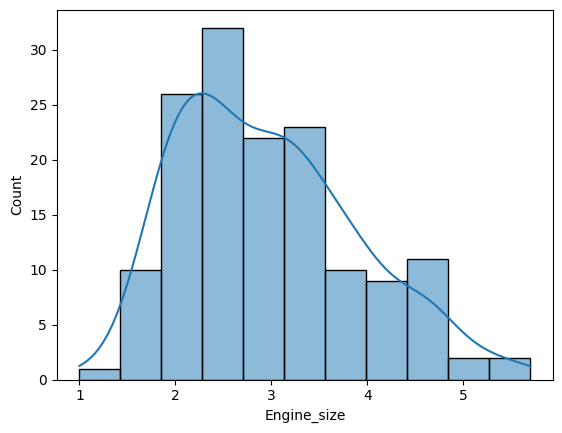

In [135]:
## univariate analysis
sns.histplot(data=df2["Engine_size"],kde=True)
plt.show()

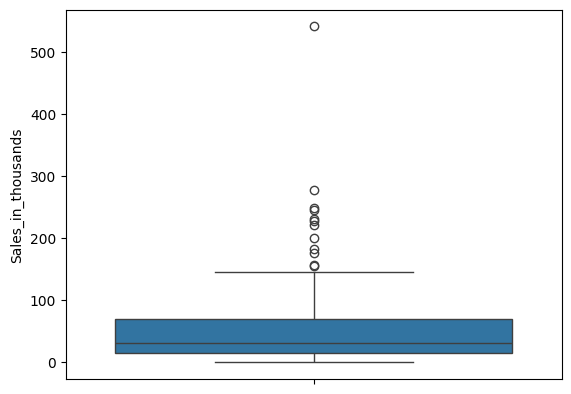

In [136]:
##  Bivariate analysiss 
sns.boxplot(data=df2["Sales_in_thousands"])
plt.show()

In [137]:
col=df.columns
col

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Kerb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

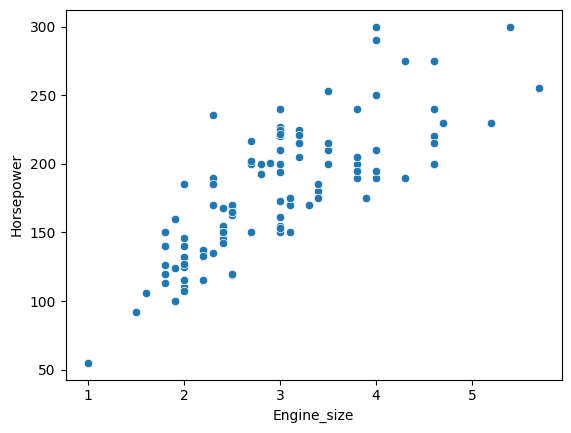

In [138]:
sns.scatterplot(x='Engine_size', y='Horsepower', data=df2)
plt.show()


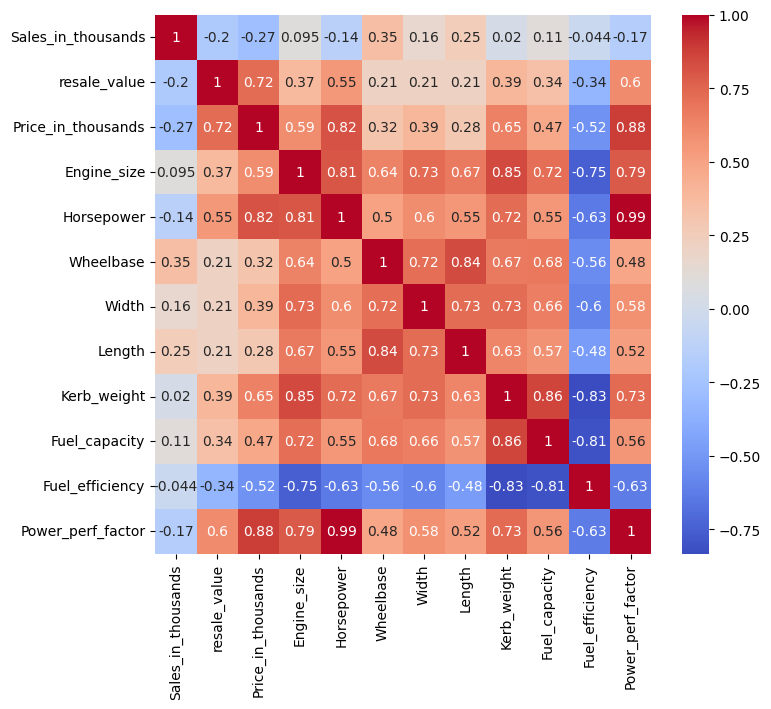

In [139]:
plt.figure(figsize=(8,7))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

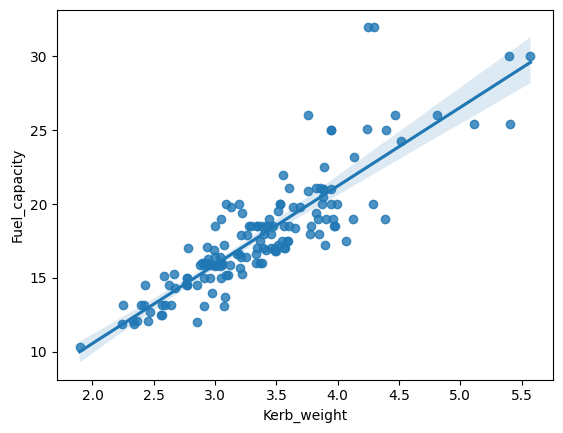

In [140]:
sns.regplot(data=df2,x="Kerb_weight",y="Fuel_capacity")
plt.show()

## 2)Can the manufacturer figure out where the market is headed in terms of car sales and predict which kind of car (based on the features provided in the dataset) they should invest in to maximize sales? Is there some change theyshould bring about to existing cars to improve sales?Should they cut down on some models to optimize their sales?

In [141]:
##  checkinng the car ssaale by  year   and  how much sale is done  and  car type which car iss saless is more 

In [142]:
df2["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [143]:
df2["Vehicle_type"].value_counts()

Vehicle_type
Passenger    108
Car           40
Name: count, dtype: int64

In [144]:
passenger_vehicles = df2[df2["Vehicle_type"] == "Passenger"]
Top=passenger_vehicles["Model"].value_counts().reset_index()
Top=Top.sort_values(by="count",ascending=False).head(10)
Top

#  if  passenger vehicle is  saleing high the  which model  do  customer prefer not large scale  is it  racing car   weith  high horse power or  normal model 

,Model,count
0,Neon,2
1,TL,1
2,Integra,1
3,A4,1
4,A6,1
5,323i,1
6,328i,1
7,528i,1
8,Century,1
9,Regal,1


 ### Here  its seen that  even if  customer are  prefering Passenger vehichle  THEY WAN  MORE  lendth  with less Kreb weight  so   i would like to  suggest mabnufacturer  to  do  focus on the  car length and the  kreb capacity   with  moderate  
### pref factor caoude  m,ost of ci=ustore  buy or invest  for their family where they  consider more  space in car

In [145]:
data=df2.groupby(["Manufacturer"]).agg({"Sales_in_thousands":"sum","resale_value":"sum"}).reset_index().sort_values(by="resale_value",ascending=False)

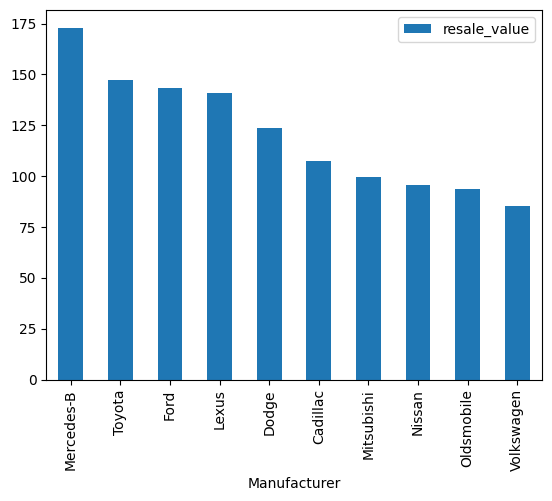

In [146]:
data=data.head(10)
data.plot(kind="bar",x="Manufacturer",y="resale_value")
plt.show()


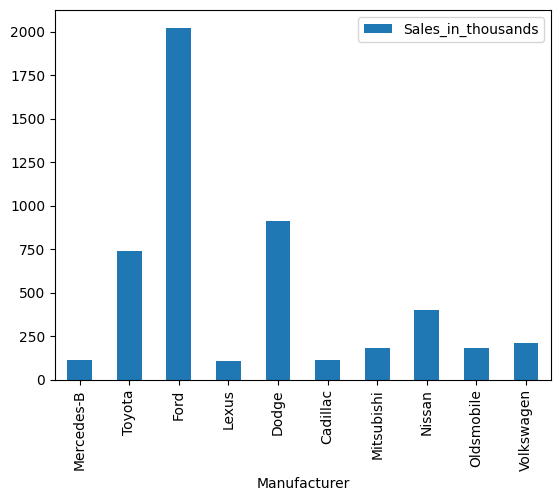

In [147]:
ddata=data.head(10)
data.plot(kind="bar",x="Manufacturer",y="Sales_in_thousands")
plt.show()

##3) Can you categorize the cars into different price segments and advise your friend on which car to buy if they want a high resale value in the different segments? Or create a consumer guideline for the least expensive car based on a set of desired features? 

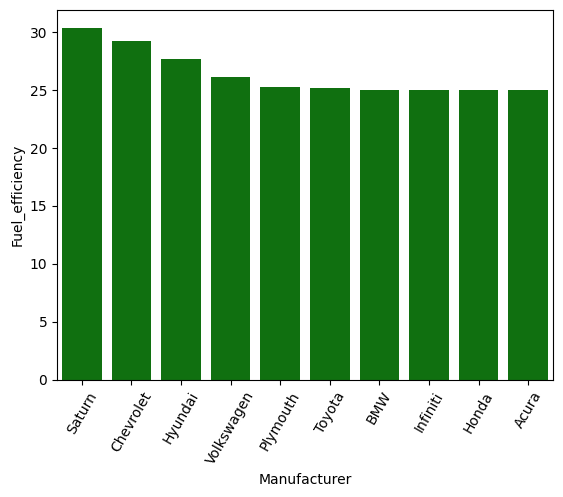

In [148]:
data1=df2.groupby("Manufacturer")["Fuel_efficiency"].mean().reset_index().sort_values(by="Fuel_efficiency",ascending=False).head(10)
sns.barplot(data=data1,x="Manufacturer",y="Fuel_efficiency",color="green")
plt.xticks(rotation=60)
plt.show()

In [149]:
data_for_sale=df2.groupby(["Manufacturer","Model","Vehicle_type"]).agg({"Price_in_thousands":"sum","Sales_in_thousands":"sum","resale_value":"sum"}).reset_index()

In [150]:
car=df2[df2["Vehicle_type"]=="Car"]
car=car.sort_values(by=["resale_value","Sales_in_thousands","Price_in_thousands"],ascending=False).head(5)

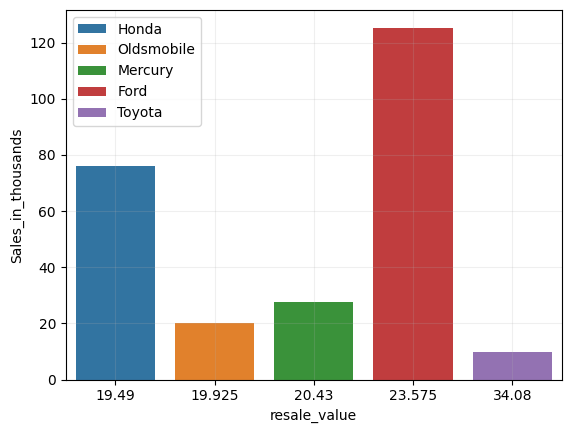

In [151]:
sns.barplot(data=car,x="resale_value",y="Sales_in_thousands",hue="Manufacturer")
plt.xlabel="Resale value"
plt.grid(alpha=0.2)
plt.legend()
plt.show()

#### After  researchimng on the sale  resale and  price i  wopuld like to   suggest  best  car  with high sale  and  moderate  procing  are Ford ,Honda,Mercury 

## What is the relationship between sales and other features? Which manufacturers and models have the highest and lowest sales? How does this vary according to different clusters? What could be the underlying reasons for this?

### Cluster 1 ( lets check the  dimensions  are  more  effective on sales  or  not like engine size,length,width,wheel base )

In [168]:
reltion_data=df2.corr(numeric_only=True)[["Sales_in_thousands"]]
reltion_data

,Sales_in_thousands
Sales_in_thousands,1.000000
resale_value,-0.200244
Price_in_thousands,-0.274831
Engine_size,0.095261
Horsepower,-0.136103
Wheelbase,0.350339
Width,0.156122
Length,0.251565
Kerb_weight,0.019905
Fuel_capacity,0.107483


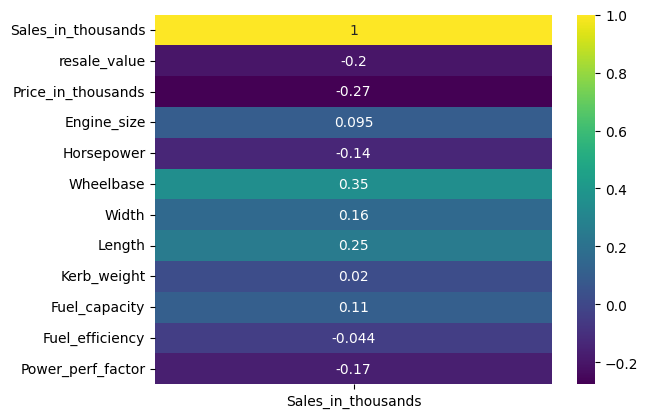

In [170]:

sns.heatmap(reltion_data,cmap="viridis",annot=True)
plt.show()



In [ ]:
### Which manufacturers and models have the highest and lowest sales?

In [172]:
df2.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Kerb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [188]:
data7=df2.groupby(["Manufacturer","Model"]).agg({"Sales_in_thousands":"sum","resale_value":"sum"}).reset_index()
data7=

,Manufacturer,Model,Sales_in_thousands,resale_value
0,Acura,Integra,16.919,16.360
1,Acura,RL,8.588,29.725
2,Acura,TL,39.384,19.875
3,Audi,A4,20.397,22.255
4,Audi,A6,18.780,23.555
...,...,...,...,...
143,Volvo,S40,16.957,13.790
144,Volvo,S70,15.245,13.790
145,Volvo,S80,18.969,13.790
146,Volvo,V40,3.545,13.790


### base  on the  cluster  1 that  is dimension   it  is shown that  the length  width  wheelbase are weak positive  co related with the  sales  

In [156]:
## cluster 2  base on the  fuel   senario 

In [157]:
fuel_data=df.iloc[:,[2,12,13]]#11 15
fuel_data

,Sales_in_thousands,Fuel_capacity,Fuel_efficiency
0,16.919,13.2,28.0
1,39.384,17.2,25.0
3,8.588,18.0,22.0
4,20.397,16.4,27.0
5,18.780,18.5,22.0
...,...,...,...
152,3.545,15.8,25.0
153,15.245,17.9,25.0
154,17.531,17.9,25.0
155,3.493,18.5,23.0


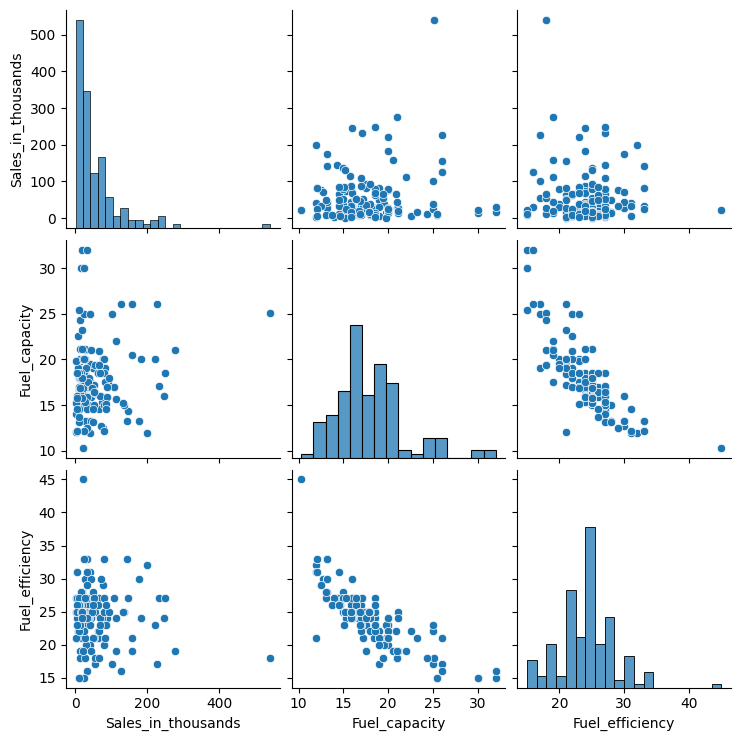

In [158]:
sns.pairplot(data=fuel_data)
plt.show()

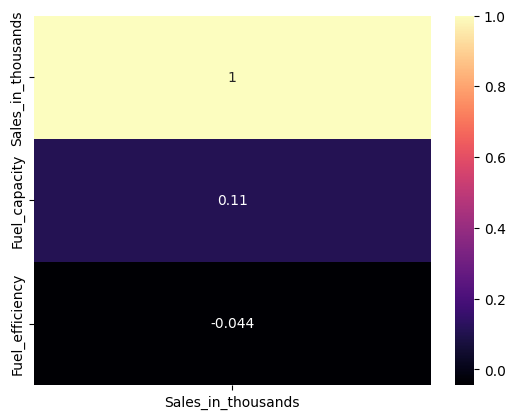

In [165]:
correlation_values2 = fuel_data.corr()
correlation_values2
sns.heatmap(correlation_values2,cmap="magma",annot=True)
plt.show()

In [160]:
## here we can see  that the fuel capacity  is slightly corealated with salae than other 


In [161]:
## Cluster 3 

In [162]:
milage_data=df.iloc[:,[2,6,7,11,15,]]#11 15
milage_data

,Sales_in_thousands,Engine_size,Horsepower,Kerb_weight,Power_perf_factor
0,16.919,1.8,140.0,2.639,58.280150
1,39.384,3.2,225.0,3.517,91.370778
3,8.588,3.5,210.0,3.850,91.389779
4,20.397,1.8,150.0,2.998,62.777639
5,18.780,2.8,200.0,3.561,84.565105
...,...,...,...,...,...
152,3.545,1.9,160.0,3.042,66.498812
153,15.245,2.4,168.0,3.208,70.654495
154,17.531,2.4,168.0,3.259,71.155978
155,3.493,2.3,236.0,3.601,101.623357


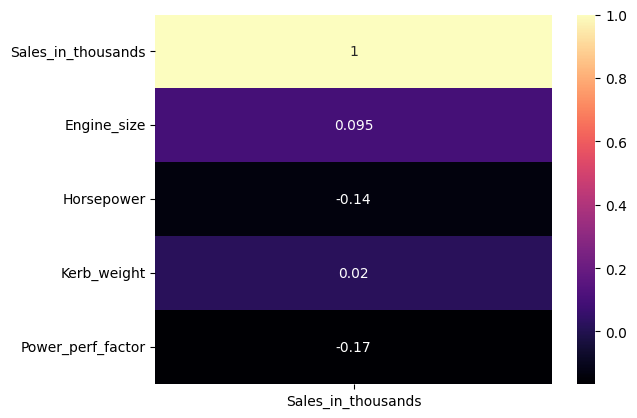

In [164]:
correlation_values3 = milage_data.corr()[["Sales_in_thousands"]]
correlation_values3
sns.heatmap(correlation_values3,cmap="magma",annot=True)
plt.show()